# CS210 Spring 2019 - Final Project 
# Human Freedom Index Dataset Exploration 

#### Group Members:
- Kaan Güney Keklikçi-24986
- Berk Karaibrahimoğlu-25244
- Yunus Emre Taşcı-25467

In [1]:
# Start import 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [4]:
import pandas as pd
import os

# End import

In [5]:
os.getcwd() # get the current working directory

'/Users/kaanguney.keklikci/Desktop/SABANCI /Sophomore Year/CS 210/Project 2'

In [6]:
d_path = "/Users/kaanguney.keklikci/Desktop/SABANCI /Sophomore Year/CS 210/Project 2"
filename = "human_freedom.csv"
df = pd.read_csv(filename)
df.head() # main csv in brief


,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [7]:
# Our main dataset will focus on the human freedom index which is our main raw csv file
# we will back-up this data with several csv files to conclude our research

# Project Description

In this project, our goal is to examine a real-world dataset composed of human freedom indexes during 2008-2016.
Our purposes come up with an international approach therefore; 
    almost all of the countries in the world are going to take place in our examinations.
Our purposes carrying out this project are;

- how human freedom(indexes) are affected by certain attributes by using certain maps such as; 
    (i.e alcohol usage -> homicidal behavior -> human freedom index) 
- use of drugs and its relation to human freedom index parameters 
- using the cause-effect between alcohol usage and the parameters in the human freedom index csv 
    (for instance; women's security) 
- violence empowered by substance usage 
     
At the end, our main objective is, to be able to compose a machine learning module for human freedom.
    By using alcohol and drug usage from other csv files, we aim to create cause and effect relationships 
    which lead us to the parameters of human freedom index.Therefore, in the end, hopefully we will be able to 
    create a ML algorithm to better describe human behavior 
    and predict under which circumstances humans feel more free.

# Null Hypothesis

*** Substance use (primarily alcohol and drugs) ;

increases the detrimental indicators of the human freedom index(i.e violence, harrassment, homicidal behavior, etc.) ***

- Testing substance use will hopefully help us develop a ML algorithm to forecast on
    what triggers these detrimentalities and how we can direct the algorithm to interpret a 
    certain cause-effect to detect other detrimentality relations.

In [8]:
# describe the dataset before head-start

In [9]:
df.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


# Dataset

We obtained the dataset from both Kaggle and ourworldindata as raw csv files.Our dataset proposes a complex structure;

- 1 main raw csv (human_freedom.csv), several other raw csv's (consisting of above-mentioned research analytics)
- Our main dataset's size is 1458 rows × 123 columns
- The main dataset focuses on almost all of the countries all over the world,
    human freedom index range is set at 2008-2016.
- Almost all data points are of type-float64
- You may find the related information below.

In [10]:
row_count, col_count = df.shape # describe the shape of main csv 
print("number of rows: {}, number of columns: {}".format(row_count, col_count))

number of rows: 1458, number of columns: 123


In [11]:
df["countries"].unique().shape # gives the count of examined countries in main csv

(162,)

In [12]:
df.dtypes # display datatypes in df

year                                    int64
ISO_code                               object
countries                              object
region                                 object
pf_rol_procedural                     float64
pf_rol_civil                          float64
pf_rol_criminal                       float64
pf_rol                                float64
pf_ss_homicide                        float64
pf_ss_disappearances_disap            float64
pf_ss_disappearances_violent          float64
pf_ss_disappearances_organized        float64
pf_ss_disappearances_fatalities       float64
pf_ss_disappearances_injuries         float64
pf_ss_disappearances                  float64
pf_ss_women_fgm                       float64
pf_ss_women_missing                   float64
pf_ss_women_inheritance_widows        float64
pf_ss_women_inheritance_daughters     float64
pf_ss_women_inheritance               float64
pf_ss_women                           float64
pf_ss                             

# Preprocessing

Here, null values (NaN) are to be dealt with (cleaning the dataset) so that our research is crytal clear; 
    which will yield better results.

In [13]:
df.isnull().sum()  # NaN counts in each column

year                                    0
ISO_code                                0
countries                               0
region                                  0
pf_rol_procedural                     578
pf_rol_civil                          578
pf_rol_criminal                       578
pf_rol                                 80
pf_ss_homicide                         80
pf_ss_disappearances_disap             89
pf_ss_disappearances_violent           80
pf_ss_disappearances_organized        179
pf_ss_disappearances_fatalities        80
pf_ss_disappearances_injuries          80
pf_ss_disappearances                   80
pf_ss_women_fgm                       172
pf_ss_women_missing                   120
pf_ss_women_inheritance_widows        541
pf_ss_women_inheritance_daughters     541
pf_ss_women_inheritance               119
pf_ss_women                           100
pf_ss                                  80
pf_movement_domestic                   98
pf_movement_foreign               

In [14]:
# now, since we have 23 columns and only some of them are necessary for our research;
# we will drop the unnecessary columns to increase readability

In [15]:
df.drop(df.columns[30:118], axis = 1, inplace = True) 
df = df.drop(["ISO_code"],axis=1)

In [16]:
df.head() # displays the dataset again

,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,6.666667,NaN,NaN,10.0,9.566667,7.54,34.0,7.568140,48.0,2.0
1,2016,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,5.000000,NaN,NaN,5.0,6.873333,4.99,159.0,5.135886,155.0,4.0
2,2016,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,5.000000,NaN,NaN,10.0,8.904444,5.17,155.0,5.640662,142.0,4.0
3,2016,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,10.000000,NaN,NaN,7.5,9.037778,4.84,160.0,6.469848,107.0,3.0
4,2016,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,6.666667,NaN,NaN,5.0,8.577778,7.57,29.0,7.241402,57.0,2.0


In [17]:
# now, let's plot some graphs with the main csv

In [18]:
# first, let's look at the correlation of attributes included in the main raw csv

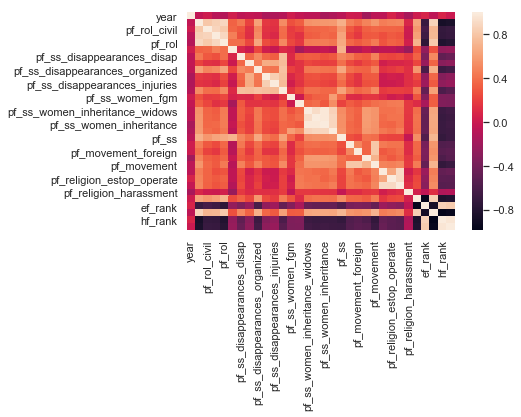

In [19]:
corr = df.corr()  # as an extra; we can use a heatmap to display the correlation between attributes

sns.heatmap(corr)

In [20]:
# fill nan values in homicide column with average value in that column

In [21]:
total = df["pf_ss_homicide"].sum()
size = df["pf_ss_homicide"].size
nullsize = df["pf_ss_homicide"].isnull().sum()

def average(total, size, nullsize):
    return total / (size-nullsize)

avg = average(total, size, nullsize)
df["pf_ss_homicide"].fillna(avg)
df.head()

,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,6.666667,NaN,NaN,10.0,9.566667,7.54,34.0,7.568140,48.0,2.0
1,2016,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,5.000000,NaN,NaN,5.0,6.873333,4.99,159.0,5.135886,155.0,4.0
2,2016,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,5.000000,NaN,NaN,10.0,8.904444,5.17,155.0,5.640662,142.0,4.0
3,2016,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,10.000000,NaN,NaN,7.5,9.037778,4.84,160.0,6.469848,107.0,3.0
4,2016,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,6.666667,NaN,NaN,5.0,8.577778,7.57,29.0,7.241402,57.0,2.0


In [22]:
df["pf_ss_homicide"] = df["pf_ss_homicide"].fillna(avg)

In [23]:
# now, let's describe the dataset by homicide column

In [24]:
df.head()

,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,...,6.666667,NaN,NaN,10.0,9.566667,7.54,34.0,7.568140,48.0,2.0
1,2016,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,...,5.000000,NaN,NaN,5.0,6.873333,4.99,159.0,5.135886,155.0,4.0
2,2016,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,...,5.000000,NaN,NaN,10.0,8.904444,5.17,155.0,5.640662,142.0,4.0
3,2016,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,10.00000,...,10.000000,NaN,NaN,7.5,9.037778,4.84,160.0,6.469848,107.0,3.0
4,2016,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,10.00000,...,6.666667,NaN,NaN,5.0,8.577778,7.57,29.0,7.241402,57.0,2.0


In [25]:
data = df.groupby(by="countries").mean()
data = data.drop(["year"],axis=1)
data.head() # year column dropped, grouped by countries

,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,...,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
countries,,,,,,,,,,,,,,,,,,,,,
Albania,5.667344,4.943461,4.128311,4.890595,8.500635,10.000000,10.000000,10.0,9.974387,9.984617,...,7.777778,10.0,7.500000,9.375000,9.744938,7.348889,43.777778,7.522911,49.777778,2.000000
Algeria,NaN,NaN,NaN,4.185818,9.554498,8.333333,7.925531,5.0,9.197526,9.384740,...,4.629630,2.5,2.500000,3.333333,7.475556,5.032222,147.444444,5.140803,147.888889,4.000000
Angola,NaN,NaN,NaN,4.474387,8.147938,5.555556,9.958938,7.5,9.990376,9.993344,...,4.074074,5.0,4.166667,6.388889,8.811852,5.142222,145.444444,5.499577,139.555556,4.000000
Argentina,6.531456,5.468369,4.144000,5.361416,7.109693,10.000000,10.000000,7.5,9.998259,9.998464,...,10.000000,10.0,10.000000,9.166667,9.246420,5.233333,143.555556,6.677056,95.111111,2.888889
Armenia,NaN,NaN,NaN,4.779035,8.952523,10.000000,10.000000,7.5,9.911200,9.969424,...,6.666667,5.0,5.000000,5.000000,8.372593,7.634444,20.888889,7.413269,53.777778,2.000000


***Let's leave other NaN values as they are since we are not currently working on them***

In [26]:
nullsize_upd = df.pf_religion_harassment.isnull().sum()
total = df.pf_religion_harassment.size
sum_col = df["pf_religion_harassment"].sum()
val = average(sum_col, total, nullsize_upd)
df["pf_religion_harassment"] = df["pf_religion_harassment"].fillna(val) 

# for further research, NaN values in that column are replaced with the column's average

In [27]:
df_2 = pd.read_csv("alcohol_use.csv") # second csv read
df_3 = pd.read_csv("drug_use.csv") # third csv read

In [28]:
df_2.columns = df_2.columns.str.replace('Entity','countries') # change column names here to countries
df_3.columns = df_3.columns.str.replace("Entity", "countries")
df_2.head()

,countries,Code,Year,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
0,Afghanistan,AFG,1990,0.672404
1,Afghanistan,AFG,1991,0.671768
2,Afghanistan,AFG,1992,0.670644
3,Afghanistan,AFG,1993,0.669738
4,Afghanistan,AFG,1994,0.669260


In [29]:
df_3.head()

,countries,Code,Year,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
0,Afghanistan,AFG,1990,1.677082
1,Afghanistan,AFG,1991,1.684746
2,Afghanistan,AFG,1992,1.694334
3,Afghanistan,AFG,1993,1.705320
4,Afghanistan,AFG,1994,1.716069


In [30]:
df_2 = df_2[df_2["Year"]>=2008]
df_2 = df_2[df_2["Year"]<2017]

In [31]:
alcohol = df_2.groupby("countries").mean()
alcohol = alcohol.drop(["Year"], axis = 1)
alcohol.head()

,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
countries,
Afghanistan,0.661820
Albania,1.838978
Algeria,0.664003
American Samoa,1.137927
Andean Latin America,1.570642


In [32]:
df_3 = df_3[df_3["Year"]>=2008]
df_3 = df_3[df_3["Year"]<2017]
drug = df_3.groupby("countries").mean()
drug = drug.drop(["Year"], axis = 1)
drug.head()

,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
countries,
Afghanistan,2.548937
Albania,0.505620
Algeria,1.682510
American Samoa,0.766078
Andean Latin America,0.669900


In [33]:
df = pd.merge(df, alcohol, on = "countries") # now, finally merge all three datasets together
df = pd.merge(df, drug, on = "countries")
df.head()

,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent) (%),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)
0,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.0,...,NaN,10.00,9.566667,7.54,34.0,7.568140,48.0,2.0,1.838978,0.50562
1,2015,Albania,Eastern Europe,6.108121,4.802975,4.583263,5.164786,9.096927,10.0,10.0,...,NaN,10.00,9.233333,7.53,34.0,7.558539,49.0,2.0,1.838978,0.50562
2,2014,Albania,Eastern Europe,5.569809,5.041787,4.302964,4.971520,8.397686,10.0,10.0,...,NaN,10.00,9.704444,7.48,38.0,7.615083,47.0,2.0,1.838978,0.50562
3,2013,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,8.300775,10.0,10.0,...,7.5,8.75,9.660000,7.27,53.0,7.389597,53.0,2.0,1.838978,0.50562
4,2012,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,7.849344,10.0,10.0,...,7.5,8.75,9.955556,7.20,59.0,7.435191,54.0,2.0,1.838978,0.50562


In [34]:
# now, exploring the df by some graphs...

# Data Exploration 

- Generating histograms, scatter plots before moving onto hypothesis testing...

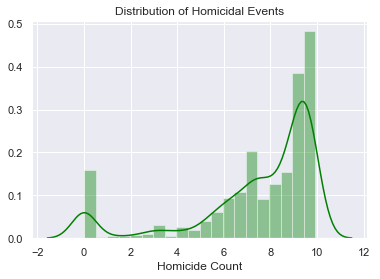

In [35]:
sns.distplot(df["pf_ss_homicide"], norm_hist=True, color = "green")  # examine homicidal behavior
plt.xlabel("Homicide Count")
plt.title("Distribution of Homicidal Events")
plt.show()

In [36]:
# before examining how secure women really are in our df;
# first fill the nan value with the average

In [37]:
secure_total = df["pf_ss_women"].sum()
nullsum = df["pf_ss_women"].isnull().sum()
sizetotal = df["pf_ss_women"].size
null_fill = average(secure_total, sizetotal, nullsum)
df["pf_ss_women"] = df["pf_ss_women"].fillna(null_fill) 

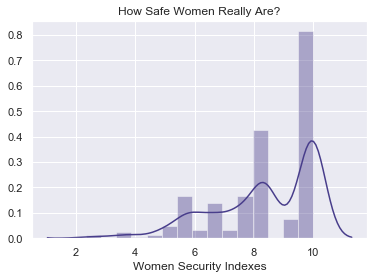

In [38]:
sns.distplot(df["pf_ss_women"], norm_hist=True, bins = 15, color = "darkslateblue")  # examine homicidal behavior
plt.xlabel("Women Security Indexes")
plt.title("How Safe Women Really Are?")
plt.show()

In [39]:
# now, generating scatter plots to observe the cause-effect relationship better 
# between substance use and human freedom index parameters

In [40]:
df.columns

Index(['year', 'countries', 'region', 'pf_rol_procedural', 'pf_rol_civil',
       'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent',
       'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities',
       'pf_ss_disappearances_injuries', 'pf_ss_disappearances',
       'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters',
       'pf_ss_women_inheritance', 'pf_ss_women', 'pf_ss',
       'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women',
       'pf_movement', 'pf_religion_estop_establish',
       'pf_religion_estop_operate', 'pf_religion_estop',
       'pf_religion_harassment', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent) (%)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)'],
   

In [41]:
df.rename({"Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent) (%)":'Alcohol use (Percentage)'}, axis=1, inplace=True)
df.rename({"Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent) (%)":'Drug use (Percentage)'}, axis=1, inplace=True)
df.rename({"pf_religion_harassment":'Harrasment'}, axis=1, inplace=True)
df.rename({"pf_ss_women":'Security of Women'}, axis=1, inplace=True)
df.rename({"pf_ss_homicide":'Homicides'}, axis=1, inplace=True)
df.head() # for convenience while plotting the graphs


,year,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,Homicides,pf_ss_disappearances_disap,pf_ss_disappearances_violent,...,pf_religion_estop_operate,pf_religion_estop,Harrasment,ef_score,ef_rank,hf_score,hf_rank,hf_quartile,Alcohol use (Percentage),Drug use (Percentage)
0,2016,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.0,...,NaN,10.00,9.566667,7.54,34.0,7.568140,48.0,2.0,1.838978,0.50562
1,2015,Albania,Eastern Europe,6.108121,4.802975,4.583263,5.164786,9.096927,10.0,10.0,...,NaN,10.00,9.233333,7.53,34.0,7.558539,49.0,2.0,1.838978,0.50562
2,2014,Albania,Eastern Europe,5.569809,5.041787,4.302964,4.971520,8.397686,10.0,10.0,...,NaN,10.00,9.704444,7.48,38.0,7.615083,47.0,2.0,1.838978,0.50562
3,2013,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,8.300775,10.0,10.0,...,7.5,8.75,9.660000,7.27,53.0,7.389597,53.0,2.0,1.838978,0.50562
4,2012,Albania,Eastern Europe,5.000000,4.900000,3.600000,4.493651,7.849344,10.0,10.0,...,7.5,8.75,9.955556,7.20,59.0,7.435191,54.0,2.0,1.838978,0.50562


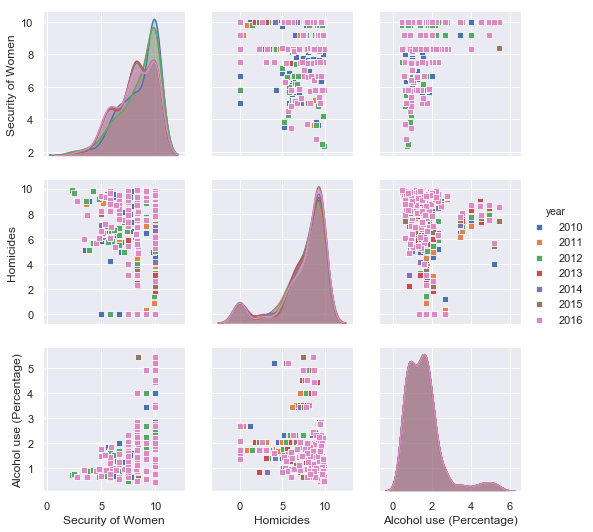

In [42]:
scatter = ["Security of Women", "Homicides", "Alcohol use (Percentage)"]

# filter the year, look at the relationship between alcohol usage, homicide and women security indexes
sns.pairplot(data=df[df["year"] >= 2010], vars=scatter, hue="year", markers=",")
plt.show()

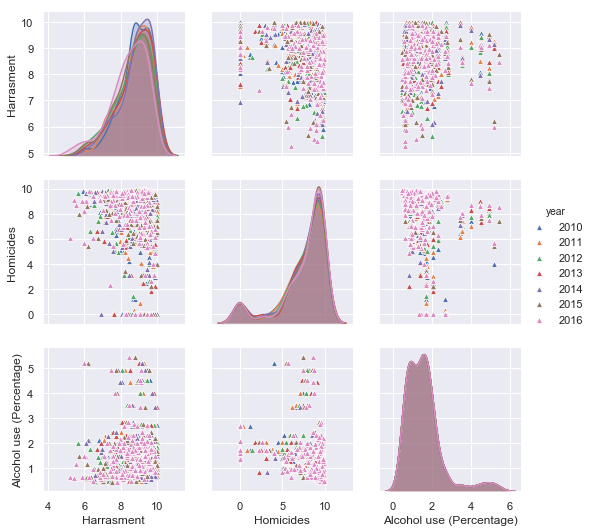

In [51]:
# now, examine the harrassment with the same approach

plot_scatter = ["Harrasment", "Homicides", "Alcohol use (Percentage)"]
sns.pairplot(data=df[df["year"] >= 2010], vars=plot_scatter, hue="year", markers = "^")

plt.show()

In [52]:
# do the same for drug usage

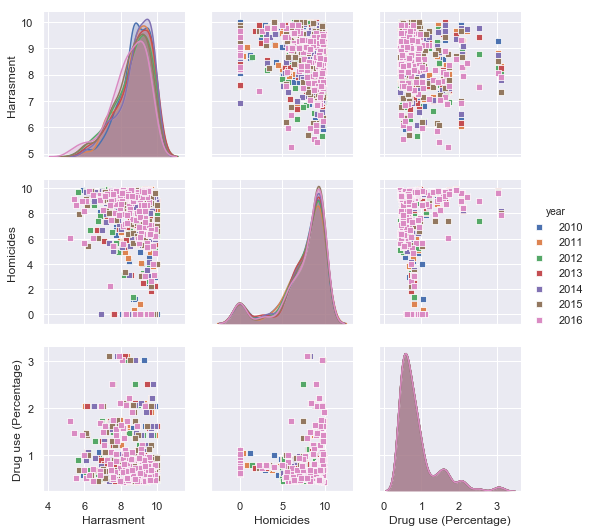

In [53]:
scatter = ["Harrasment", "Homicides", "Drug use (Percentage)"]

# filter the year, look at the relationship between alcohol usage, homicide and women security indexes
sns.pairplot(data=df[df["year"] >= 2010], vars=scatter, hue="year", markers=",")
plt.show()

### *** Extracting Some Insights ***

In [54]:
extracted_a = df.groupby("countries").mean()["Alcohol use (Percentage)"].sort_values(ascending=False)[:5]
extracted_d = df.groupby("countries").mean()["Drug use (Percentage)"].sort_values(ascending=False)[:5]

In [55]:
# top 3 avg. alcohol consumption 
print(extracted_a)

countries
Belarus      5.443941
Russia       5.219721
Estonia      4.950581
Ukraine      4.918527
Lithuania    4.517387
Name: Alcohol use (Percentage), dtype: float64


In [56]:
# top 3 avg. drug usage 
print(extracted_d)

countries
United States           3.098369
United Arab Emirates    3.013726
Libya                   2.519594
Canada                  2.210821
Lebanon                 2.108631
Name: Drug use (Percentage), dtype: float64


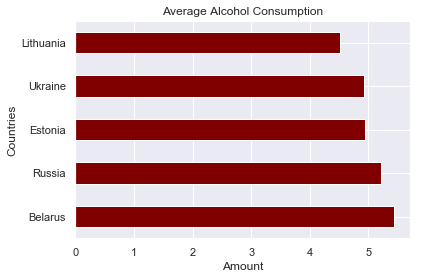

In [57]:
extracted_a.plot(kind="barh", color="maroon")  # bar plotted
                                            
plt.xlabel("Amount")
plt.ylabel("Countries")
plt.title("Average Alcohol Consumption")
plt.show()

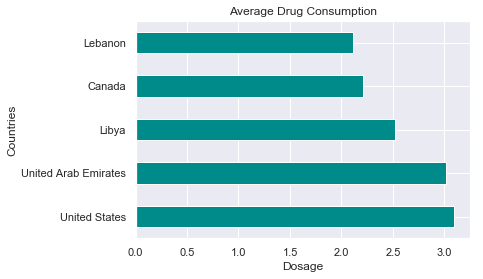

In [58]:
extracted_d.plot(kind="barh", color="darkcyan")  # bar plotted
                                            
plt.xlabel("Dosage")
plt.ylabel("Countries")
plt.title("Average Drug Consumption")
plt.show()

In [59]:
# top five of each attribute displayed

In [60]:
# Focusing on our research;
# now, examine; 
    # alcohol usage -> homicidal behavior -> human freedom indexes

### *** How does alcohol consumption relate to homicidal behavior? ***

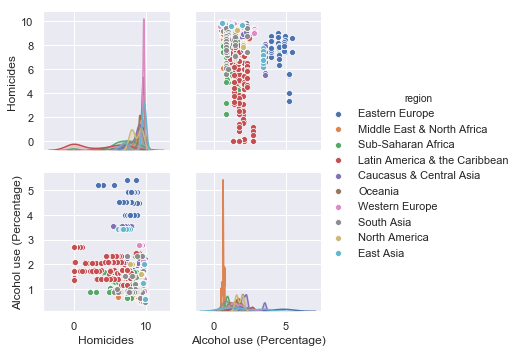

In [61]:
plot_scatter = ["Homicides", "Alcohol use (Percentage)"]
sns.pairplot(data=df, vars=plot_scatter, hue="region", markers = "o")
plt.show()

In [62]:
df.columns

Index(['year', 'countries', 'region', 'pf_rol_procedural', 'pf_rol_civil',
       'pf_rol_criminal', 'pf_rol', 'Homicides', 'pf_ss_disappearances_disap',
       'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized',
       'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries',
       'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters',
       'pf_ss_women_inheritance', 'Security of Women', 'pf_ss',
       'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women',
       'pf_movement', 'pf_religion_estop_establish',
       'pf_religion_estop_operate', 'pf_religion_estop', 'Harrasment',
       'ef_score', 'ef_rank', 'hf_score', 'hf_rank', 'hf_quartile',
       'Alcohol use (Percentage)', 'Drug use (Percentage)'],
      dtype='object')

In [63]:
df.rename({"pf_ss_disappearances_violent":'Violence Measure'}, axis=1, inplace=True)

### *** How does drug use relate to violence? ***

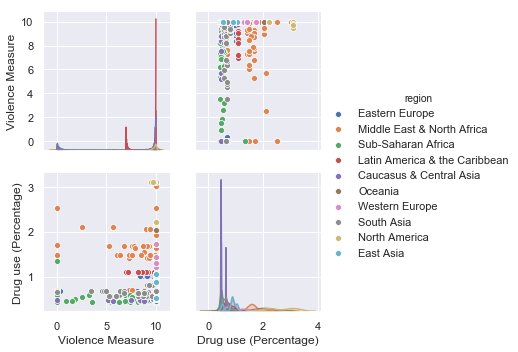

In [64]:
plot_scatter = ["Violence Measure", "Drug use (Percentage)"]
sns.pairplot(data=df, vars=plot_scatter, hue="region", markers = "o")
plt.show()

# Hypothesis Testing

- It is a well-known phenomena that substance use triggers violence, homicidal behavior and simultaneously endangers
women's security. 

-In our research, we now wish to backup our findings in the previous sections and test our null hypothesis;
    - Does susbtance use really live up to its phenomena and puts human freedom in potential danger by certain means?
******************

In [65]:
# if we want to convert to make the density plot more readable

def multiply(x):
    return x*10
df["Alcohol use (Percentage)"] = df["Alcohol use (Percentage)"].apply(multiply)
df["Drug use (Percentage)"] = df["Drug use (Percentage)"]

In [66]:
def divide(x): # in case we want to reverse
    return x/10
df["Alcohol use (Percentage)"] = df["Alcohol use (Percentage)"].apply(divide) 

In [67]:
df["Harrasment"] = df["Harrasment"].apply(divide) 

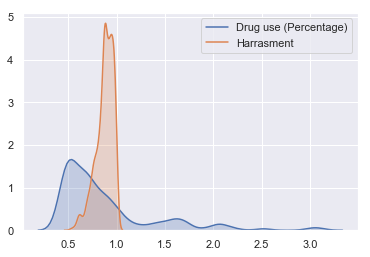

In [68]:
ax = sns.kdeplot(df["Drug use (Percentage)"], shade=True)          
sns.kdeplot(df["Harrasment"], ax=ax, shade=True)         
plt.show()

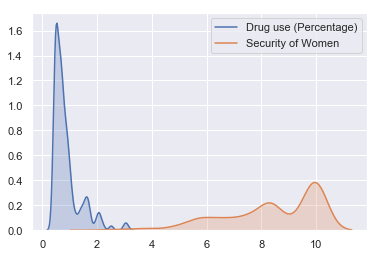

In [69]:
ax = sns.kdeplot(df["Drug use (Percentage)"], shade=True) # not related, no need to specify while testing
sns.kdeplot(df["Security of Women"], ax=ax, shade=True)
plt.show()

In [70]:
df["Homicides"] = df["Homicides"].apply(divide)

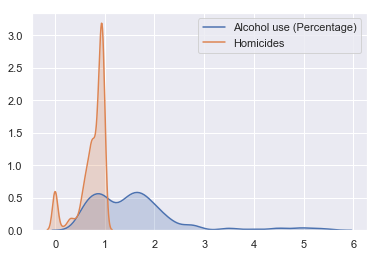

In [71]:
ax = sns.kdeplot(df["Alcohol use (Percentage)"], shade=True) 
sns.kdeplot(df["Homicides"], ax=ax, shade=True)
plt.show()

*** Notice that:
    
    - Alcohol & Homicide graph is much like Drug & Harrasment graph
    
    - Since we have two columns to compare, we are going to utilize t-test.
***

In [72]:
# Extract the values here
alcohol_vals = df["Alcohol use (Percentage)"].values
homicide_vals = df["Homicides"].values

In [73]:
_, p_value = stats.ttest_ind(a=alcohol_vals, b=homicide_vals, equal_var=False)
p_value # two-sided test for the null hypothesis that 2 independent samples 

3.7008848837667525e-171

### -> Since the alpha(significance level) is set to be 0.05; 
- In that sense; 
    - anything lower than that lets us reject the null hypothesis
********************

In [74]:
# perform another extraction here this time on alcohol use and harrassment
harrass_vals = df["Harrasment"].values

In [75]:
_, p_value = stats.ttest_ind(a=alcohol_vals, b=harrass_vals, equal_var=False)
p_value # two-sided test for the null hypothesis that 2 independent samples 

7.708607789481091e-135

### -> Since the alpha(significance level) is set to be 0.05; 
- In that sense; 
    - anything lower than that lets us reject the null hypothesis
********************

In [76]:
# sample extraction for drug use
drug_vals = df["Drug use (Percentage)"].values

In [77]:
_, p_value = stats.ttest_ind(a=drug_vals, b=homicide_vals, equal_var=False)
p_value # two-sided test for the null hypothesis that 2 independent samples 

2.6640430250709754e-17

### -> Since the alpha(significance level) is set to be 0.05; 
- In that sense; 
    - anything lower than that lets us reject the null hypothesis
********************

In [78]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split

# *** Linear Regression ***

- In this section, we aim to demonstrate a linear relationship between certain identities positioned in our dataset.
- Rules are simple:
    - Two columns at a time
    - Algebraic Linearity

In [79]:
alcohol_df = pd.DataFrame(data = df["Alcohol use (Percentage)"]) # do dataframe conversions here
drug_df = pd.DataFrame(data = df["Drug use (Percentage)"])
homicide_df = pd.DataFrame(data = df["Homicides"])
harrass_df = pd.DataFrame(data = df["Harrasment"])

In [80]:
df.rename({"pf_ss_disappearances_fatalities":'Fatality Measure'}, axis=1, inplace=True)

In [81]:
# perform one inital linearity as an example

In [82]:
df_copy = df.drop(["countries"], axis = 1)
df_copy = df.drop(["region"], axis = 1)
df_copy = df.drop(["Fatality Measure"], axis = 1)

In [83]:
df_copy = df.drop(df.select_dtypes(['object']), axis=1) # drop object type data for linearity

In [84]:
df_copy.shape[1] # column count

34

In [85]:
for i in range(33): # drop all nan values in df
    df_copy.dropna(axis = 1, inplace = True)
df_copy.drop(["year"], inplace=True, axis = 1)

In [86]:
alcohol_df = pd.DataFrame(data = df_copy["Alcohol use (Percentage)"]) # do dataframe conversions here
drug_df = pd.DataFrame(data = df_copy["Drug use (Percentage)"])
homicide_df = pd.DataFrame(data = df_copy["Homicides"])
harrass_df = pd.DataFrame(data = df_copy["Harrasment"])

In [87]:
homicide_df = homicide_df.apply(divide)

In [88]:
df_copy.drop(["Homicides"], axis=1, inplace=True)

In [89]:
X = df_copy
y = homicide_df

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [90]:
 X.shape

(1332, 4)

In [91]:
y.shape # shapes checked, they're of the same length

(1332, 1)

In [92]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Our function is linear. If it had only one feature, it would be in the form of

$ y = a  x + b $

However, our dataset includes much more features. 

Index(['pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal', 'pf_rol',
       'Homicides', 'pf_ss_disappearances_disap', 'Violence Measure',
       'pf_ss_disappearances_organized', 'pf_ss_disappearances_injuries',
       'pf_ss_disappearances', 'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters',
       'pf_ss_women_inheritance', 'Security of Women', 'pf_ss',
       'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women',
       'pf_movement', 'pf_religion_estop_establish',
       'pf_religion_estop_operate', 'pf_religion_estop', 'Harrasment',
       'ef_score', 'ef_rank', 'hf_score', 'hf_rank', 'hf_quartile',
       'Alcohol use (Percentage)', 'Drug use (Percentage)'],
      dtype='object')

There are lots of columns, so we will write the equation for 3-chosen parameters.

$ Alcohol use (Percentage) = a_1 Homicides + a_2 SecurityofWomen + a_3 Harrassment + a_4 Drug use (Percentage)  $
$ Drug use (Percentage) = a_1 Homicides + a_2 SecurityofWomen + a_3 Harrassment  + a_4 Alcohol use (Percentage) $     

-  These linearities will help us determine how these attributes are related to one another;
    - and how they all relate to human freedom indexes as a whole in the end.

In [93]:
lr.coef_ 

array([[ 0.00027274, -0.06530852, -0.0032727 ,  0.00676471]])

In [94]:
lr.intercept_

array([0.1289013])

In [95]:
for index, col_name in enumerate(homicide_df.columns): # coefficient for homicide specifically
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))

The coefficient for Homicides is 0.00027273780220722757


In [96]:
# now, checking all coefficients 
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))

The coefficient for Security of Women is 0.00027273780220722757
The coefficient for Harrasment is -0.06530851619373262
The coefficient for Alcohol use (Percentage) is -0.0032727007500345903
The coefficient for Drug use (Percentage) is 0.006764712013737771


In [97]:
X_test.shape

(333, 4)

In [98]:
y_test.shape

(333, 1)

In [99]:
# Now, we can evaluate our model by using the score function

lr.score(X_test,y_test)

0.09865005336869437

### *** Calculate MEAN SQUARED ERROR ***

*********************************

In [100]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

0.0007529730194156014


- This mean squared error (**REVISED AFTER SECOND SUBMISSION**) represents the best line fit that we can get for our data; 
- even for relationships that are not relatable such as;
- our instance where we examined alcohol and drug usage to decrease human freedom indexes.
    
***********************************

### Conclusively, 

    - Both linear regression and our plots indicate that although at some points, there are exceptions;
        - There is no direct relationship between alcohol and drug usage to decrease human freedom indexes.
***********************************

# Machine Learning 

- In this section, our goal is to construct two ML algorithms consisting the instances of our dataset.
- Selected algorithms for this section are:
    - K-Nearest Neighbors Algorithm
    - Decision Tree
    
***********************************************************************

## * 1. K-Nearest Neighbors Algorithm *

**********************************************************

In [101]:
homicide_df.head() # our target df

,Homicides
0,0.089204
1,0.090969
2,0.083977
3,0.083008
4,0.078493


In [102]:
homicide_df["Homicides"].unique()
# a lot of unique values since datapoints are all floats and represent a ratio of homicidal count
# i.e. frequency

array([0.08920429, 0.09096927, 0.08397686, 0.08300775, 0.07849344,
       0.0805922 , 0.08272417, 0.08852373, 0.08756539, 0.09456254,
       0.0940992 , 0.09499199, 0.09443111, 0.09695814, 0.09718697,
       0.09687586, 0.09623645, 0.0806026 , 0.08257535, 0.07622974,
       0.07386323, 0.06996849, 0.0880875 , 0.08971528, 0.09009022,
       0.09129085, 0.09097824, 0.09012373, 0.09221495, 0.08656781,
       0.08665851, 0.09623538, 0.09603354, 0.09585937, 0.09576687,
       0.09574092, 0.09558715, 0.0958228 , 0.09516078, 0.09510835,
       0.09737912, 0.09787986, 0.09791503, 0.09710881, 0.09629001,
       0.09645384, 0.09724136, 0.09756274, 0.09721771, 0.09143499,
       0.0900671 , 0.09058101, 0.09127893, 0.09087734, 0.0912944 ,
       0.        , 0.00193205, 0.01625463, 0.09790481, 0.09847956,
       0.09876944, 0.09780954, 0.09645408, 0.09561192, 0.09784674,
       0.08998765, 0.0886729 , 0.08884822, 0.08943279, 0.08969281,
       0.08951555, 0.08878334, 0.08898161, 0.05637136, 0.06471

In [103]:
# check the features here again before carry-on
df_copy.head()

,Security of Women,Harrasment,Alcohol use (Percentage),Drug use (Percentage)
0,7.500000,0.956667,1.838978,0.50562
1,7.500000,0.923333,1.838978,0.50562
2,7.500000,0.970444,1.838978,0.50562
3,7.500000,0.966000,1.838978,0.50562
4,8.333333,0.995556,1.838978,0.50562


- Since all floats have to be converted to ints in order to construct the model;
    - we have to make the necessary conversion from ratio to int.
**************************************************************

In [104]:
def test_multiply(x):
    temp = x * 100
    return temp

test = homicide_df.apply(test_multiply)
test = test.astype(int)
test.head()

# necessary conversion made here

,Homicides
0,8
1,9
2,8
3,8
4,7


In [105]:
# perform another train and test set here before the algorithm itself
X = df_copy
y = test

# %25 for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing k = 5, default
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
# prediction variable for our model
y_pred = KNN.predict(X_test)

In [108]:
# Check performance with accuracy_score
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.6666666666666666


In [109]:
# checking again if we can improve our score if we change the cluster distance

In [110]:
KNN_10 = KNeighborsClassifier(n_neighbors=10)
KNN_10.fit(X_train, y_train)

y_pred_10 = KNN_10.predict(X_test)
print("Accuracy of the model with k = 10 :",metrics.accuracy_score(y_test, y_pred_10))

Accuracy of the model with k = 10 : 0.6126126126126126


### -> Extraction of accuracies for the two sample results above

- Now, it is time to create a plot where we;
    - obtain many k-values 
    - calculate their accuracy scores and display the results in a plot

***********************************

In [111]:
# choosing 15 random k's would probably be a nice representation

In [112]:
algorithm = []
for k in range (1, 15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    algorithm.append(metrics.accuracy_score(y_test, y_pred))

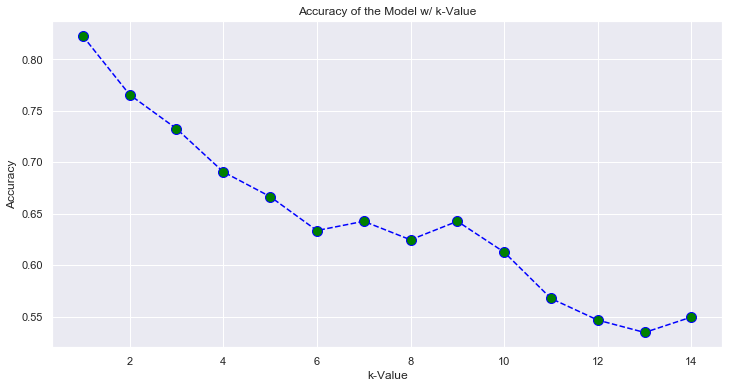

In [113]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), algorithm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [114]:
df_copy.head()

,Security of Women,Harrasment,Alcohol use (Percentage),Drug use (Percentage)
0,7.500000,0.956667,1.838978,0.50562
1,7.500000,0.923333,1.838978,0.50562
2,7.500000,0.970444,1.838978,0.50562
3,7.500000,0.966000,1.838978,0.50562
4,8.333333,0.995556,1.838978,0.50562


- Since k-NN calculates distances between data points to assign classes to them, we have to scale our data in this case.

<b> - Scaling is normalization. </b>

- In other words, since some distances are huge compared to the others, we have to scale in order to have proper clusters. 

********************************************************************************************

In [115]:
test_copy = df_copy.dropna(axis=1, how='all')
test_copy.head() # all nan values are dropped, ready for test

,Security of Women,Harrasment,Alcohol use (Percentage),Drug use (Percentage)
0,7.500000,0.956667,1.838978,0.50562
1,7.500000,0.923333,1.838978,0.50562
2,7.500000,0.970444,1.838978,0.50562
3,7.500000,0.966000,1.838978,0.50562
4,8.333333,0.995556,1.838978,0.50562


In [116]:
test_copy.drop(["Security of Women"], axis = 1, inplace = True) 
# datapoints are unnecessarily big

In [117]:
normalized = (test_copy-test_copy.mean()) / test_copy.std()

In [118]:
normalized.head() # display the normalized dataframe here

,Harrasment,Alcohol use (Percentage),Drug use (Percentage)
0,0.866408,0.258574,-0.741871
1,0.496747,0.258574,-0.741871
2,1.019201,0.258574,-0.741871
3,0.969913,0.258574,-0.741871
4,1.297679,0.258574,-0.741871


In [120]:
homicide_df.head() # other decimal points have been neglected for calculation ease

,Homicides
0,0.089204
1,0.090969
2,0.083977
3,0.083008
4,0.078493


 -> <b>Since we have to convert homicide_df to int d-type because we are going to perform the test;<b>
    
    - We are going to iterate homicide_df in a loop:
        - convert datapoints that are higher than 0.8 to 1
        - convert datapoints that are lower than or equal to 0.8 to 0
- Since ratios are quite high, we had to set it at 0.8 instead of something like 0.5.

In [121]:
# since floats are not iterable, we are going to iterate by sustaining the ratio as well as converting to int 

In [122]:
def hundred(x):
    temp = x *100
    return temp
homicide_df = homicide_df.apply(hundred)
homicide_df.head()

,Homicides
0,8.920429
1,9.096927
2,8.397686
3,8.300775
4,7.849344


In [127]:
homicide_df = homicide_df.astype(int)
homicide_df.head()

,Homicides
0,8
1,9
2,8
3,8
4,7


In [136]:
test_var = homicide_df["Homicides"].values
test_var # converted to numpy array

array([8, 9, 8, ..., 7, 7, 7])

In [138]:
# fill the target array
homicide_test = []
for i in test_var:
    if(test_var[i] >= 8):
        homicide_test.append(1)
    else:
        homicide_test.append(0)

In [141]:
test_x = homicide_test[0:999] # take the subset of homicide_df for test
print(len(test_x))

999


In [146]:
normalized_x = normalized.iloc[0:999] # same here
normalized_x.shape

(999, 3)

### - Building k-NN model with normalized data; 

In [147]:
data = normalized_x
y = test_x

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size= 0.25, random_state = 42)

In [148]:
data.head()

,Harrasment,Alcohol use (Percentage),Drug use (Percentage)
0,0.866408,0.258574,-0.741871
1,0.496747,0.258574,-0.741871
2,1.019201,0.258574,-0.741871
3,0.969913,0.258574,-0.741871
4,1.297679,0.258574,-0.741871


In [149]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy of the model with k = 5 and using normalized features: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 and using normalized features:  0.988


**********************************************************
-> <b>0.988<b> is a much better result than our score before normalization which turned out to be in %60's.
    
    - Now, we will generate a sample of k-values to model our accuracy scores in a plot.
**********************************************************

In [156]:
normalized_data = []
for k in range (1, 15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    normalized_data.append(metrics.accuracy_score(y_test, y_pred))

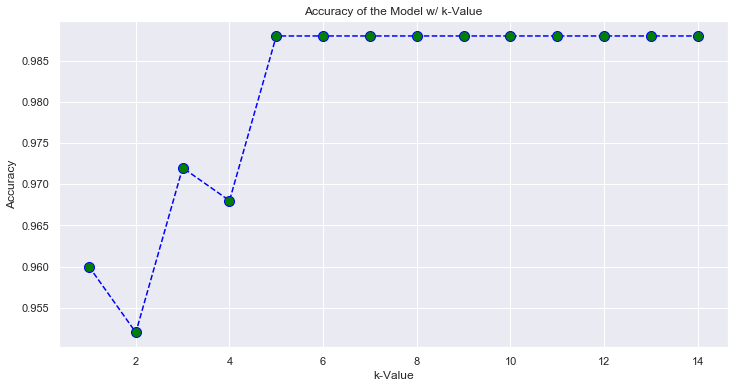

In [158]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), normalized_data, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

**********************************************************
### *** k-NN MODEL RESULTS AND EXTRACTIONS ***

********************************************
        - kNN is a supervised machine learning algorithm
        
        - calculates the distance of a new data point to all other training data points
        
        - selects the K-nearest data points, where K can be any integer
        
        - assigns the data point to the class to which the majority of the K data points belong

    - Complexity increases as k-value decreases
    
    - Accuracy increases as k-value decreases(i.e more complex)
    
    - With this test, model can be interpreted to different data in contrary to train test
    
        - Testing accuracy yields better results
    
    - We can predict the response values using our model for our beforehand predictions
    
    - Testing accuracy penalizes models that are too complex or not complex enough
    
    - 98.8% is a very good result (although better results could very well be obtained), 
    
        - promising for our model to make good predictions in the future.

**********************************************************

## * 2. Decision Tree Algorithm *
*********************************************
- First, let's explain decision tree algorithm concept briefly:
**********************************************************

 - Attribute selection and iformation gain
    
 - Attribute selection:
        
 - Gini and Entropy statistical approaches are most common to attain attribute values to these features;

 - then place them in the tree.(Highest score becomes the root)
            
 - $ Gini: Gini(E) = 1−∑^c_{j=1} p^2_j $

 - $ Entropy: H(E) = −∑^c_{j=1} p_j logp_j $
            
 - The decision tree for each node calculates the weight entropy average of each node;
        
 - repeats this algorithm to split its operations in order to predict the correct label from our testset.
    
*********************************************************************

-> <b> Ever since our linear regression; we are more and more interested in homicidal rate.<b>

***********************************************************

    - By using other datapoints on the remaining features of our data, 

        - we can predict the decision label on these rates. 
        
***********************************************************

In [208]:
X = test_copy # these are features
y = test_var # this is what we want to predict, using previously obtained homicidal(binary) data

In [182]:
from sklearn.model_selection import train_test_split

# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [183]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [184]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [185]:
y_predict = model.predict(X_test)

In [186]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.755

 <b> -> Accuracy score here denotes how successful our decision tree can be while predicting labels from our testset.

    - Now, we need to construct a confusion matrix to find out how this score is calculated.

In [196]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[ 30,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   2,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   5,   3,   1,   0,   0,   0,   0],
       [  0,   0,   1,   3,   1,   1,   4,   0,   0,   0],
       [  0,   0,   0,   0,   2,  10,   7,   2,   0,   0],
       [  0,   0,   0,   0,   2,   7,  27,  11,   1,   3],
       [  0,   0,   3,   0,   1,   3,   5,  35,   3,   1],
       [  0,   0,   0,   0,   0,   1,   0,   9,  37,   4],
       [  0,   0,   0,   0,   0,   0,   1,   2,  10, 156]])

In [202]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Non-Homicidal Part', 'Predicted Homicidal Part', 'a', 'b', 'c', 'd', 'x', 'y', 'z', 't'], 
    index=["True Non-Homicidal","True Homicidal","True Non-Homicidal","True Homicidal", "True Non-Homicidal","True Homicidal","True Non-Homicidal","True Homicidal","True Non-Homicidal","True Homicidal" ])

,Predicted Non-Homicidal Part,Predicted Homicidal Part,a,b,c,d,x,y,z,t
True Non-Homicidal,30,0,1,0,0,0,0,0,0,0
True Homicidal,0,1,0,0,0,0,0,0,0,0
True Non-Homicidal,0,3,0,2,0,1,0,0,0,0
True Homicidal,0,0,0,5,3,1,0,0,0,0
True Non-Homicidal,0,0,1,3,1,1,4,0,0,0
True Homicidal,0,0,0,0,2,10,7,2,0,0
True Non-Homicidal,0,0,0,0,2,7,27,11,1,3
True Homicidal,0,0,3,0,1,3,5,35,3,1
True Non-Homicidal,0,0,0,0,0,1,0,9,37,4
True Homicidal,0,0,0,0,0,0,1,2,10,156


### Regression with Decision Tree

In this confusion matrix, 

- Prediction of homicidal part where true label was also homicidal ratio denotes true positives (TP),
- Prediction of homicidal part where true label was non-homicidal denotes false positives (FP),
- Prediction of non-homicidal part where true label was also non-homicidal denotes false positives (TN),
- Prediction of non-homicidal part where true label was homicidal ratio denotes false positives (FN)

Then, we can define accuracy as;

<b>Accuracy</b> = (TP + TN) / ( TP + FN + TN + FN )

There are also other metrics to evaluate our algorithms, you can check precision and recall below.

<b>Precision</b> = TP / ( TP + FP )

<b>Recall</b> = TP / ( TP + FN )

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [204]:
# now, we proceed with decision tree regressor
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [205]:
y_pred = regressor.predict(X_test)

In [206]:
# real values vs predicted values
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

In [207]:
df_compare # show the compared matrix

,Actual,Predicted
0,9,9.000000
1,9,9.000000
2,0,0.000000
3,7,7.000000
4,7,8.000000
5,7,7.000000
6,9,9.000000
7,5,5.000000
8,9,9.000000
9,9,8.000000


<b> -> NOW, we have come to the end of our ML techniques.

    - Let's look at which one performed better and why :

In [209]:
# k-NN's success rate at last was 98.8%
# we can provide a simple accuracy measure for our df_compare and calculate the efficiency score 

In [210]:
equal = 0 # sum of equals between actual and predicted
for i in df_compare["Actual"]:
    if(df_compare["Actual"][i] == df_compare["Predicted"][i]):
        equal += 1
print(equal)

143


In [211]:
df_compare.shape

(267, 2)

In [222]:
# so 143 votes suggest 100% percent accuracy

In [227]:
# now, let's look at the rest
vote = 0 # votes in percentage from the remainders(124)
for i in df_compare["Actual"]:
    if(df_compare["Actual"][i] != df_compare["Predicted"][i]):
        diff = abs(df_compare["Actual"][i] - df_compare["Predicted"][i])
        mistake = (diff / df_compare["Actual"][i])
        success = (1 - mistake)*100 # success vote
        vote += success
accuracy = (vote+(100*143))/267 # this is going to result in percentage, final calculation
print(accuracy)

94.80411390523743


*********************************************

****Before finishing off, let's analyze both algorithms in terms of what features they are able to work best with.****

*********************************************

                           ## Decision Tree and What Works Best with It
        
******************************************
- **ADVANTAGES** :
******************************************
    - intuitively very easy to explain(reflect human decision making closely)
    
    - can be used both for classification problems and regression problems

    - can be displayed graphically, can be framed, can be intrepreted easily
    
    - predictions have room for improvement
******************************************
- **DISADVANTAGES** :
******************************************
    - not as accurate as others because;
    
        - a small change can cause a major change in final estiamtion
        
        - pre-pruning(stopping tree growth before perfect generalization) cannot stop this either 
        
        - even in such cases decision trees tend to overfit and provide poor generalization performances
******************************************
- **FEATURE SELECTION** :
******************************************
    - as each splitting operation is independent of one another;
    
    - works well with features that are on completely different scales.
    
    - features that are a mix of binary and continuos datapoints

************************

                            ## k-NN Algorithm and What Works Best with It
        
******************************************
- **ADVANTAGES** :
******************************************
    - used for both classification and regression
    
    - don't take any parameters, no assumptions about the dataset
    
    - training step is much faster compared to other ML algorithms
    
    - easy algorithm pick, predict and apply

******************************************
- **DISADVANTAGES** :
******************************************
    
    - computationally expensive
        
    - prediction is costly
    
    - has to store all datapoints -> high memory 
    
    - sensitive to corrupted data 
******************************************
- **FEATURE SELECTION** :
******************************************

    - can only perform tests with discrete target data and relevant normalized features
    
    - else either yields poor performance results or does not yield any results at all

***********************************************

## -> Comparing k-NN to Decision Tree;

    - Mathematically k-NN yielded better results :
        
        - 98.8% k-NN accuracy rate
        
        - 94.80% decision tree accuracy rate

- Hence, we have come to the end of our ML algorithms section.

In [229]:
# End of Project